# Model Evaluation

## Agenda

1. Null accuracy, handling missing values
2. Confusion matrix, sensitivity, specificity, setting a threshold
3. Handling categorical features, interpreting logistic regression coefficients
4. Cross-Validation

## Part 1: Null Accuracy, Handling Missing Values

Recall the Lab from last lesson on Logistic Regression. We will be revisting the ideas introduced using the Titanic dataset again.

For a description of the Titanic dataset see this Kaggle page: https://www.kaggle.com/c/titanic/data

In [138]:
# TASK 1: read the data from titanic.csv into a DataFrame
import pandas as pd
titanic = pd.read_csv('titanic.csv', index_col='PassengerId')

# TASK 2: define Pclass/Parch as the features and Survived as the response
feature_cols = ['Pclass', 'Parch']
X = titanic[feature_cols]
y = titanic.Survived
#X = ___
#y = ___

# TASK 3: split the data into training and testing sets
# I have added test_size to control and improve the model performance
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75,random_state=1)

# TASK 4: fit a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)

# TASK 5: make predictions on testing set and calculate accuracy
y_pred_class = logreg.predict(X_test)
from sklearn import metrics
print (metrics.accuracy_score(y_test, y_pred_class))

0.675635276532


In [176]:
X

,Pclass,Parch,Age
PassengerId,,,
1,3,0,22.000000
2,1,0,38.000000
3,3,0,26.000000
4,1,0,35.000000
5,3,0,35.000000
6,3,0,29.699118
7,1,0,54.000000
8,3,1,2.000000
9,3,2,27.000000


In [178]:
y


0         3
1         8
2         5
3         3
4         0
5         0
6         2
7         1
8         1
9         8
10       12
11       26
12       29
13       47
14       35
15       40
16       41
17       15
18        9
19        6
20       11
21        3
22       11
23       15
24        4
25        1
26        1
27        2
28        2
29        0
         ..
17349    12
17350    16
17351     9
17352     5
17353     6
17354    10
17355     4
17356     6
17357     3
17358     0
17359     0
17360     0
17361     0
17362     2
17363     9
17364    13
17365    33
17366    43
17367    52
17368    38
17369    62
17370    69
17371    30
17372    14
17373    10
17374    11
17375     8
17376     7
17377    13
17378    12
Name: casual, dtype: int64

### Null accuracy

Null accuracy is the accuracy that could be achieved by always predicting the **most frequent class**. It is a baseline against which you may want to measure your classifier.

In [139]:
# compute null accuracy manually
print (y_test.mean())
print (1 - y_test.mean())

0.40358744394618834
0.5964125560538116


In [140]:
# equivalent function in scikit-learn
# http://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html
from sklearn.dummy import DummyClassifier
dumb = DummyClassifier(strategy='most_frequent')
dumb.fit(X_train, y_train)
y_dumb_class = dumb.predict(X_test)
print (metrics.accuracy_score(y_test, y_dumb_class))

0.596412556054


In [180]:
# equivalent function in scikit-learn
# http://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html
from sklearn.dummy import DummyClassifier
dumb1 = DummyClassifier(strategy='stratified')
dumb1.fit(X_train, y_train)
y_dumb1_class = dumb1.predict(X_test)
print (metrics.accuracy_score(y_test, y_dumb1_class))

0.497757847534


In [182]:
# equivalent function in scikit-learn
# http://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html
from sklearn.dummy import DummyClassifier
dumb2 = DummyClassifier(strategy='uniform')
dumb2.fit(X_train, y_train)
y_dumb2_class = dumb2.predict(X_test)
print (metrics.accuracy_score(y_test, y_dumb2_class))

0.47533632287


In [186]:
# equivalent function in scikit-learn
# http://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html
from sklearn.dummy import DummyClassifier
prior=0.01
dumb3 = DummyClassifier(strategy='prior')
dumb3.fit(X_train, y_train)
y_dumb3_class = dumb3.predict(X_test)
print (metrics.accuracy_score(y_test, y_dumb3_class))

0.57399103139


### Handling missing values

scikit-learn models expect that all values are **numeric** and **hold meaning**. Thus, missing values are not allowed by scikit-learn.

One possible strategy is to just **drop missing values**:

In [141]:
# check for missing values
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [187]:
titanic.shape

(891, 11)

In [142]:
# drop rows with any missing values
titanic.dropna().shape

(183, 11)

In [143]:
# drop rows where Age is missing
titanic[titanic.Age.notnull()].shape

(714, 11)

Sometimes a better strategy is to **impute missing values**:

In [144]:
# fill missing values for Age with the mean age
titanic.Age.fillna(titanic.Age.mean(), inplace=True)

In [188]:
# check Age missing is imputed
titanic[titanic.Age.notnull()].shape

(891, 11)

In [10]:
# equivalent function in scikit-learn, supports mean/median/most_frequent
from sklearn.preprocessing import Imputer
imp = Imputer(strategy='mean', axis=1)
titanic['Age'] = imp.fit_transform(titanic.Age.reshape(1,-1)).T

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [189]:
# include Age as a feature
feature_cols = ['Pclass', 'Parch', 'Age']
X = titanic[feature_cols]
X

,Pclass,Parch,Age
PassengerId,,,
1,3,0,22.000000
2,1,0,38.000000
3,3,0,26.000000
4,1,0,35.000000
5,3,0,35.000000
6,3,0,29.699118
7,1,0,54.000000
8,3,1,2.000000
9,3,2,27.000000


In [145]:
# include Age as a feature
feature_cols = ['Pclass', 'Parch', 'Age']
X = titanic[feature_cols]

# TASK : split the data into training and testing sets
#X_train, X_test, y_train, y_test = ...
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# TASK : fit a logistic regression model
#logreg...
logreg = logreg.fit(X_train, y_train)
# TASK : make predictions on testing set and calculate accuracy
#y_pred_class = ...
#print ...
y_pred_class = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.67264573991


## Part 2: Confusion Matrix

In [146]:
# confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[107,  21],
       [ 52,  43]])

For a plotting function that will plot a nice confusion matrix see: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

In [147]:
# %load confusion_matrix_nice.py
# from confusion_matrix_nice import plot_confusion_matrix
%run confusion_matrix_nice

Confusion matrix, without normalization
[[107  21]
 [ 52  43]]


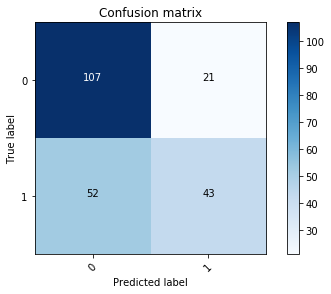

In [30]:
# plot an attractive confusion matrix
cnf_mat = metrics.confusion_matrix(y_test, y_pred_class, labels = titanic.Survived.unique())
class_labels = titanic.Survived.unique()
plt.figure()
plot_confusion_matrix(cnf_mat, class_labels,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)
plt.show()

In [148]:
# calculate the sensitivity
43 / float(52 + 43)

0.45263157894736844

In [149]:
# calculate the sensitivity
#43 / float(52 + 43)
#0.45263157894736844

# general
sensitivity=cnf_mat[1,1]/float(cnf_mat[1,0]+cnf_mat[1,1])
sensitivity


0.45263157894736844

In [150]:
# calculate the specificity
# 107 / float(107 + 21)

In [151]:
# general, suitable for any outcome of cnf mat
specificity=cnf_mat[0,0]/float(cnf_mat[0,0]+cnf_mat[0,1])
specificity

0.8359375

In [152]:
percision=cnf_mat[0,0]/float(cnf_mat[0,0]+cnf_mat[1,0])
percision

0.67295597484276726

In [153]:
recall=cnf_mat[0,0]/float(cnf_mat[0,0]+cnf_mat[0,1])
recall

0.8359375

In [154]:
F1=2*percision*recall/float((percision+recall))
F1

0.74564459930313576

In [155]:
F1=2*cnf_mat[0,0]/float(cnf_mat[0,0]+cnf_mat[1,0])*cnf_mat[0,0]/float(cnf_mat[0,0]+cnf_mat[0,1])/(cnf_mat[0,0]/float(cnf_mat[0,0]+cnf_mat[1,0])+cnf_mat[0,0]/float(cnf_mat[0,0]+cnf_mat[0,1]))
F1

0.74564459930313576

In [156]:
# store the predicted probabilities
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

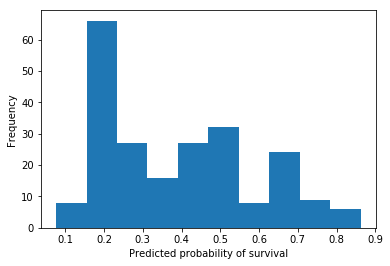

In [157]:
# plot the predicted probabilities
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(y_pred_prob)
plt.xlabel('Predicted probability of survival')
plt.ylabel('Frequency')

In [158]:
# change the threshold for predicting survived to increase sensitivity
import numpy as np
y_pred_class = np.where(y_pred_prob > 0.25, 1, 0)

In [159]:
# equivalent function in scikit-learn
from sklearn.preprocessing import binarize
y_pred_class = binarize(y_pred_prob.reshape(1,-1), 0.25).T
#y_pred_class

In [160]:
# new confusion matrix
print (metrics.confusion_matrix(y_test, y_pred_class))

[[57 71]
 [27 68]]


In [161]:
# new sensitivity
print (68 / float(27 + 68))

0.7157894736842105


In [162]:
# new specificity
print (57 / float(57 + 71))

0.4453125


## Part 3: Cross Validation Example on Bike Share

#### Intro to cross validation with bike share data

In [163]:
from sklearn import cross_validation
#from sklearn.cross_validation import KFold
bikeshare = pd.read_csv('bikeshare.csv')

#### Create dummy variables and set outcome (dependent) variable

In [164]:
weather = pd.get_dummies(bikeshare.weathersit, prefix='weather')
modeldata = bikeshare[['temp', 'hum']].join(weather[['weather_1', 'weather_2', 'weather_3']])
y = bikeshare.casual 


#### Create a cross validation with 5 folds

In [127]:
y

PassengerId
1      0
2      1
3      1
4      1
5      0
6      0
7      0
8      0
9      1
10     1
11     1
12     1
13     0
14     0
15     0
16     1
17     0
18     1
19     0
20     1
21     0
22     1
23     1
24     1
25     0
26     1
27     0
28     0
29     1
30     0
      ..
862    0
863    1
864    0
865    0
866    1
867    1
868    0
869    0
870    1
871    0
872    1
873    0
874    0
875    1
876    1
877    0
878    0
879    0
880    1
881    1
882    0
883    0
884    0
885    0
886    0
887    0
888    1
889    0
890    1
891    0
Name: Survived, dtype: int64

In [165]:
kf = cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True)


In [166]:
from sklearn import linear_model 

In [170]:
mse_values = []
scores = []
n= 0
print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf:
    lm = linear_model.LinearRegression().fit(modeldata.iloc[train_index], y.iloc[train_index])
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lm.predict(modeldata.iloc[test_index])))
    scores.append(lm.score(modeldata, y))
    n+=1
    print ('Model', n)
    print ('MSE:', mse_values[n-1])
    print ('R2:', scores[n-1])


print ("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print ('Mean of MSE for all folds:', np.mean(mse_values))
print ('Mean of R2 for all folds:', np.mean(scores))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 1471.3445964
R2: 0.311905323577
Model 2
MSE: 1742.20506263
R2: 0.311922281387
Model 3
MSE: 1687.75980234
R2: 0.311899688573
Model 4
MSE: 1702.09378791
R2: 0.311924765387
Model 5
MSE: 1762.2200335
R2: 0.311898020196
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 1673.12465656
Mean of R2 for all folds: 0.311910015824


In [167]:
lm = linear_model.LinearRegression().fit(modeldata, y)
print ("~~~~ Single Model ~~~~")
print ('MSE of single model:', metrics.mean_squared_error(y, lm.predict(modeldata)))
print ('R2: ', lm.score(modeldata, y))

~~~~ Single Model ~~~~
MSE of single model: 1672.58110765
R2:  0.311934605989


### Check
While the cross validated approach here generated more overall error, which of the two approaches would predict new data more accurately: the single model or the cross validated, averaged one? Why?


Answer: 

In [ ]:
It eppears the single model with higher R-square and lower MSE

## Part 4: Apply Cross Validation to the Titanic Dataset

In [44]:
import pandas as pd
titanic = pd.read_csv('titanic.csv', index_col='PassengerId')

In [45]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

In [76]:
from sklearn.preprocessing import Imputer
imp = Imputer(strategy='mean', axis=1)
titanic['Age'] = imp.fit_transform(titanic.Age.reshape(1,-1)).T

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


In [77]:
feature_cols = ['Pclass', 'Parch', 'Age']
X = titanic[feature_cols]
y = titanic.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
logreg=LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])

In [78]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=100)
print (scores)
print (scores.mean())

[ 0.8         0.7         0.3         0.7         0.7         0.6         0.8
  0.5         0.6         0.9         0.5         0.5         0.6         0.6
  0.6         0.5         0.7         0.6         0.7         0.8         0.7
  0.8         0.8         0.7         0.5         0.5         0.9         0.7
  0.8         0.6         0.8         0.5         0.9         0.6         0.4
  0.6         0.9         0.8         0.6         0.7         0.7         0.8
  0.88888889  0.66666667  0.77777778  0.77777778  0.66666667  0.77777778
  0.55555556  0.875       0.75        0.625       0.625       0.75        0.625
  0.75        0.75        0.75        0.75        0.75        0.625       0.75
  0.875       0.625       0.875       1.          0.875       0.75        0.875
  0.75        0.5         0.75        0.75        0.625       0.875       0.625
  0.75        0.875       0.875       0.875       0.625       0.875       0.625
  0.625       0.875       0.75        0.625       0.5       

### Task: Evaluate each stage of the model with Cross-Validation

In [ ]:
# N/A

### Task: Evaluate the Cross-Validation score with different values of n (2, 5, 10, 50)

In [168]:
kf2 = cross_validation.KFold(len(modeldata), n_folds=2, shuffle=True,random_state=1)

from sklearn import linear_model

In [136]:
kf2

sklearn.cross_validation.KFold(n=17379, n_folds=2, shuffle=True, random_state=1)

In [169]:
mse_values = []
scores = []
n= 0
print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf2:
    lm = linear_model.LinearRegression().fit(modeldata.iloc[train_index], y.iloc[train_index])
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lm.predict(modeldata.iloc[test_index])))
    scores.append(lm.score(modeldata, y))
    n+=1
    print ('Model', n)
    print ('MSE:', mse_values[n-1])
    print ('R2:', scores[n-1])


print ("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print ('Mean of MSE for all folds:', np.mean(mse_values))
print ('Mean of R2 for all folds:', np.mean(scores))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 1686.74885662
R2: 0.311844116323
Model 2
MSE: 1659.68577407
R2: 0.311850332503
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 1673.21731534
Mean of R2 for all folds: 0.311847224413


In [173]:
kf10 = cross_validation.KFold(len(modeldata), n_folds=10, shuffle=True,random_state=1)
from sklearn import linear_model
mse_values = []
scores = []
n= 0
print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf10:
    lm = linear_model.LinearRegression().fit(modeldata.iloc[train_index], y.iloc[train_index])
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lm.predict(modeldata.iloc[test_index])))
    scores.append(lm.score(modeldata, y))
    n+=1
    print ('Model', n)
    print ('MSE:', mse_values[n-1])
    print ('R2:', scores[n-1])


print ("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print ('Mean of MSE for all folds:', np.mean(mse_values))
print ('Mean of R2 for all folds:', np.mean(scores))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 1860.10075325
R2: 0.311924662002
Model 2
MSE: 1576.35815877
R2: 0.311905863323
Model 3
MSE: 1611.93272006
R2: 0.311912720153
Model 4
MSE: 1676.68644185
R2: 0.3119285077
Model 5
MSE: 1709.00635897
R2: 0.31192288973
Model 6
MSE: 1624.26000865
R2: 0.311924285114
Model 7
MSE: 1545.28783028
R2: 0.31191631575
Model 8
MSE: 1833.61051986
R2: 0.311888925687
Model 9
MSE: 1628.09411951
R2: 0.311926400386
Model 10
MSE: 1668.83279763
R2: 0.311914489696
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 1673.41697088
Mean of R2 for all folds: 0.311916505954


In [174]:
kf50 = cross_validation.KFold(len(modeldata), n_folds=50, shuffle=True,random_state=1)
from sklearn import linear_model
mse_values = []
scores = []
n= 0
print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf50:
    lm = linear_model.LinearRegression().fit(modeldata.iloc[train_index], y.iloc[train_index])
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lm.predict(modeldata.iloc[test_index])))
    scores.append(lm.score(modeldata, y))
    n+=1
    print ('Model', n)
    print ('MSE:', mse_values[n-1])
    print ('R2:', scores[n-1])


print ("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print ('Mean of MSE for all folds:', np.mean(mse_values))
print ('Mean of R2 for all folds:', np.mean(scores))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 1632.6576737
R2: 0.311930135282
Model 2
MSE: 1846.31180986
R2: 0.311930899613
Model 3
MSE: 1669.50563349
R2: 0.311931128731
Model 4
MSE: 1808.15345738
R2: 0.311929540908
Model 5
MSE: 2337.49328167
R2: 0.311927759009
Model 6
MSE: 1870.07361735
R2: 0.311933003088
Model 7
MSE: 1473.38838172
R2: 0.311927942138
Model 8
MSE: 1778.23126457
R2: 0.311929304945
Model 9
MSE: 1150.24104632
R2: 0.311930155711
Model 10
MSE: 1628.37388847
R2: 0.311930814742
Model 11
MSE: 1554.65371038
R2: 0.311932756302
Model 12
MSE: 1355.77554584
R2: 0.311926280294
Model 13
MSE: 1793.0613788
R2: 0.311932467335
Model 14
MSE: 1585.03980882
R2: 0.311933731228
Model 15
MSE: 1737.53024958
R2: 0.311932443226
Model 16
MSE: 1726.1876977
R2: 0.311930351066
Model 17
MSE: 1857.19303881
R2: 0.311928433741
Model 18
MSE: 1945.39751044
R2: 0.311928194612
Model 19
MSE: 1309.68058113
R2: 0.311922466671
Model 20
MSE: 1570.6798169
R2: 0.311931142063
Model 21
MSE: 1850.67656141
R2: 0.31

### Task: Experiment with differen model evaluation metrics form sci-kit learn

See a list of model evaluatin metrics here. Particulary try precision and recall and f1. Read about available methods and what they mean here:
http://scikit-learn.org/stable/modules/model_evaluation.html



In [107]:
 metrics.f1_score(y_test, y_pred_class)

0.58119658119658124

In [108]:
 metrics.f1_score(y_test, y_pred_class, average=None)

array([ 0.53773585,  0.58119658])

In [110]:
 metrics.f1_score(y_test, y_pred_class, average='macro')

0.55946621512659256

In [111]:
metrics.f1_score(y_test, y_pred_class, average='micro')

0.5605381165919282

In [112]:
metrics.f1_score(y_test, y_pred_class, average='weighted')

0.55625051073058518

In [175]:
# calcualte F1 from confusing matrix directly
F1=2*cnf_mat[0,0]/float(cnf_mat[0,0]+cnf_mat[1,0])*cnf_mat[0,0]/float(cnf_mat[0,0]+cnf_mat[0,1])/(cnf_mat[0,0]/float(cnf_mat[0,0]+cnf_mat[1,0])+cnf_mat[0,0]/float(cnf_mat[0,0]+cnf_mat[0,1]))
F1

0.74564459930313576